# Math 131 Assignment 2: Lagrange interpolant

## Exercise 1: Lagrange interpolant

In [1]:
%matplotlib inline

In [2]:
import numpy as np
from matplotlib import pyplot as plt
from numpy import exp

In [19]:
def lagrange_poly(x, datx, daty):
    '''
    Lagrange interpolant ...
    '''
    N = len(datx)
    L = np.ones((len(x),N)) #list that contains anything, size of each element can vary
    for i in range(N):
        for j in range(N):
            if i != j:
                L[:,i] = L[:,i] * (x - datx[j]) / (datx[i]-datx[j])
    y = np.zeros((len(x)))
    #print(L.shape)
    for k in range(N):
        y = y + daty[k]*L[:,k]
    return y
          

In [20]:
f1 = lambda x: exp(-x**2)
datx = np.arange(-3, 3.1, 1) # ATTENTION !! needs to change the upper bound if one wants point included
daty = f1(datx)
x = np.arange(-3, 3.0001, 0.01)
print(x.shape)
P1 = lagrange_poly(x,datx,daty)

(601,)


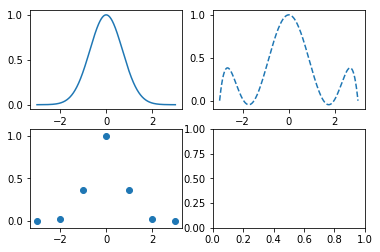

In [37]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2)
ax1.plot(x,f1(x))
ax2.plot(x,P1,'--')
ax3.scatter(datx,daty)

In [22]:
0.1+0.2 == 0.3

False

In [23]:
def myrange(start, stop , step):
    return np.linspace(start, stop, int(((stop-start) / step) + 1))

In [24]:
myrange(0, 10, 1)

array([  0.,   1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.,  10.])

## Assessments

In [25]:
assert len(lagrange_poly.__doc__)>0

In [26]:
assert lagrange_poly(x,datx,daty)[0] == exp(-9) 

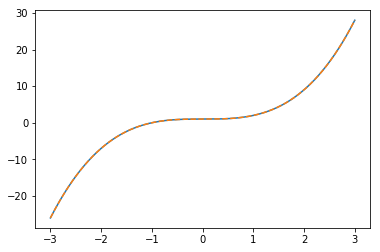

In [28]:
f3 = lambda x: x**3 + 1
P2 = lagrange_poly(x,datx,f3(datx))
plt.plot(x,f3(x))
plt.plot(x,P2,'--')

In [33]:
assert all(np.isclose(P2,f3(x)))

In [ ]:
np.isclose

# Exercise 2: Newton's divided differences

In [126]:
import functools 

def newtons_divided_differences(x,datx,daty):
    '''
    doc to do
    '''
    @functools.lru_cache() #least recently used
    def F(i,k):
        # access to datx, daty
        if k == 0: 
            return daty[i]
        else:
            return (F(i+1,k-1) - F(i, k-1)) / (datx[i+k]-datx[i])
        
    ssum = np.zeros(len(x))
#     for i in range(0, 7): 
#         print('---')
#         for j in range(0, 7):
#             try:
#                 print(F(i,j))
#             except: 
#                 pass


    for k in range(1,len(datx)+1):
        G = np.ones(len(x))
        for j in range(k-1):
            G = G * (x - datx[j])
        truc = G * F(0,k-1)
        ssum = ssum + truc
    return ssum, F
        
        

In [ ]:
# for k in range(len(datx)):
#     ...
#     f(datx[k])
    
# for dk in datx:
#     ...
#     f(dk)

In [127]:
P3,F = newtons_divided_differences(x,datx,f1(datx))
(exp(-4)-exp(-9))


0.018192229084647498

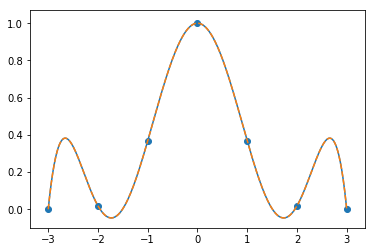

In [129]:
plt.plot(x,P1)
plt.plot(x,P3,'--')
plt.scatter(datx,f1(datx))
